<a href="https://colab.research.google.com/github/SelmaDM/Signal_Treatement/blob/master/Filtres%20et%20convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
from scipy import signal

In [2]:
img = plt.imread('lena.jpg')

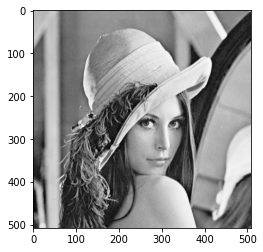

In [3]:
plt.imshow(img, cmap='Greys_r')

In [4]:
#def convolution2D(X,H,moitie):
matzero = np.zeros((510,510))
matzero[1: 509, 1: 509] = img[0: 508, 0: 508]
img = matzero
#plt.imshow(img, cmap='Greys_r')
s = img.shape


In [5]:
def convolution2D(X,H):
    s = X.shape
    #print(H.shape[1])
    py = np.int((H.shape[0]-1)/2)
    px = np.int((H.shape[1]-1)/2)
    Y = X.copy()
    imax = np.int(s[1]-px)
    for i in range(px,imax):
        for j in range(py,s[0]-py):
            somme = 0
            for k in range(-px,px+1):
                for l in range(-py,py+1):
                    somme += X[j+l][i+k]*H[l+py][k+px]
            Y[j][i] = somme
    return Y

In [6]:
passe_bas3 = np.array([[1,2,1],[2,4,2],[1,2,1]])
print(passe_bas3)
passe_bas5 = np.array([[1,4,6,4,1],[4,8,14,8,4],[6,14,28,14,6],[4,8,14,8,4],[1,4,6,4,1]])
print(passe_bas5)

[[1 2 1]
 [2 4 2]
 [1 2 1]]
[[ 1  4  6  4  1]
 [ 4  8 14  8  4]
 [ 6 14 28 14  6]
 [ 4  8 14  8  4]
 [ 1  4  6  4  1]]


<ipython-input-5-9ba21d59f7d0>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  py = np.int((H.shape[0]-1)/2)
<ipython-input-5-9ba21d59f7d0>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more det

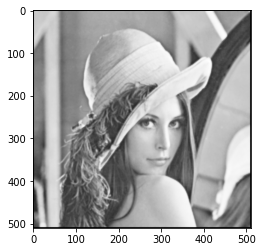

In [7]:
res = convolution2D(img,passe_bas5)
plt.imshow(res, cmap='Greys_r')

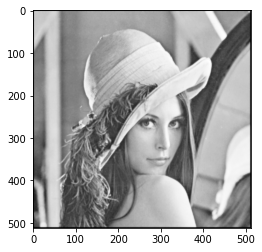

In [8]:
test = scp.signal.convolve2d(img, passe_bas3)
plt.imshow(test, cmap='Greys_r')

In [9]:
 #/// filtre passe-haute ///

In [10]:
passe_haut3 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
print(passe_haut3)

[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


In [11]:
passe_haut5 = np.array([[-1,-1,-1,-1,-1],[-1,0,0,0,-1],[-1,0,32,0,-1],[-1,0,0,0,-1],[-1,-1,-1,-1,-1]])
print(passe_haut5)

[[-1 -1 -1 -1 -1]
 [-1  0  0  0 -1]
 [-1  0 32  0 -1]
 [-1  0  0  0 -1]
 [-1 -1 -1 -1 -1]]


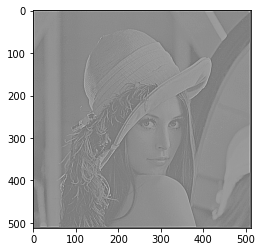

In [12]:
testh3 = scp.signal.convolve2d(img, passe_haut3)
plt.imshow(testh3, cmap='Greys_r')

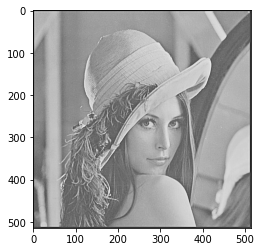

In [13]:
testh5 = scp.signal.convolve2d(img, passe_haut5)
plt.imshow(testh5, cmap='Greys_r')